                                                document  cluster
10916                    the whitewashing of james brown        0
112          texas ebola patient 'fighting for his life'        0
22112  emporia, kansas named best small town in ameri...        0
1134   woman in ninth year of letting boyfriend down ...        0
6021   how the little i do can make a difference in m...        0


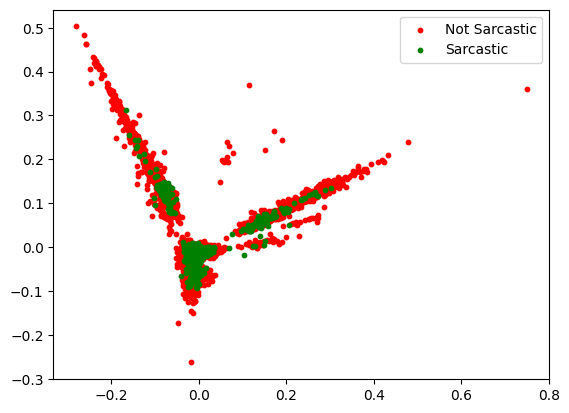

In [1]:
import json
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/PawanKrGunjan/Natural-Language-Processing/main/Sarcasm%20Detection/sarcasm.json'
df = pd.read_json(url)

sentences = df['headline']


vectorizer = TfidfVectorizer(stop_words='english')

vectorized_documents = vectorizer.fit_transform(sentences)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(vectorized_documents.toarray())

num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, n_init=5, max_iter=500, random_state=42)
kmeans.fit(vectorized_documents)

# Create a dataframe to store the results
results = pd.DataFrame()
results['document'] = sentences
results['cluster'] = kmeans.labels_

# Print the results
print(results.sample(5))  # Adjust the number of samples as needed

# Plot the results
colors = ['red', 'green']
cluster_labels = ['Not Sarcastic', 'Sarcastic']

for i in range(num_clusters):
    plt.scatter(reduced_data[kmeans.labels_ == i, 0],
                reduced_data[kmeans.labels_ == i, 1],
                s=10, color=colors[i], label=f'{cluster_labels[i]}')

plt.legend()
plt.show()
